In Chapter 2, Linear Regression, we discussed simple linear regression, multiple
linear regression, and polynomial regression. These models are special cases of the
generalized linear model, a flexible framework that requires fewer assumptions
than ordinary linear regression. In this chapter, we will discuss some of these
assumptions as they relate to another special case of the generalized linear model
called logistic regression.
Unlike the models we discussed previously, logistic regression is used for classification
tasks. Recall that the goal in classification tasks is to find a function that maps an
observation to its associated class or label. A learning algorithm must use pairs of
feature vectors and their corresponding labels to induce the values of the mapping
function's parameters that produce the best classifier, as measured by a particular
performance metric. In binary classification, the classifier must assign instances to one
of the two classes. Examples of binary classification include predicting whether or not
a patient has a particular disease, whether or not an audio sample contains human
speech, or whether or not the Duke men's basketball team will lose in the first round
of the NCAA tournament. In multiclass classification, the classifier must assign one
of several labels to each instance. In multilabel classification, the classifier must assign
a subset of the labels to each instance. In this chapter, we will work through several
classification problems using logistic regression, discuss performance measures for the
classification task, and apply some of the feature extraction techniques you learned in
the previous chapter.

# 1. Binary Classification with Logistic Regression

In some problems the response variable is not normally distributed. For instance,
a coin toss can result in two outcomes: heads or tails. The Bernoulli distribution
describes the probability distribution of a random variable that can take the positive
case with probability P or the negative case with probability 1-P. If the response
variable represents a probability, it must be constrained to the range {0,1}. Linear
regression assumes that a constant change in the value of an explanatory variable
results in a constant change in the value of the response variable, an assumption
that does not hold if the value of the response variable represents a probability.
Generalized linear models remove this assumption by relating a linear combinationOrdinary linear regression assumes that the response variable is normally distributed.
The normal distribution, also known as the Gaussian distribution or bell curve, is a
function that describes the probability that an observation will have a value between
any two real numbers. Normally distributed data is symmetrical. That is, half of the
values are greater than the mean and the other half of the values are less than the
mean. The mean, median, and mode of normally distributed data are also equal.

In some problems the response variable is not normally distributed. For instance,
a coin toss can result in two outcomes: heads or tails. The Bernoulli distribution
describes the probability distribution of a random variable that can take the positive
case with probability P or the negative case with probability 1-P. If the response
variable represents a probability, it must be constrained to the range {0,1}. Linear
regression assumes that a constant change in the value of an explanatory variable
results in a constant change in the value of the response variable, an assumption
that does not hold if the value of the response variable represents a probability.
Generalized linear models remove this assumption by relating a linear combination

In logistic regression, the response variable describes the probability that the outcome
is the positive case. If the response variable is equal to or exceeds a discrimination
threshold, the positive class is predicted; otherwise, the negative class is predicted. The
response variable is modeled as a function of a linear combination of the explanatory
variables using the logistic function. 

# 2. Spam Filtering

Our first problem is a modern version of the canonical binary classification problem:
spam classification. In our version, however, we will classify spam and ham SMS
messages rather than e-mail. We will extract TF-IDF features from the messages using
techniques you learned in Chapter 3, Feature Extraction and Preprocessing, and classify
the messages using logistic regression.

We will use the SMS Spam Classification Data Set from the UCI Machine Learning
Repository. The dataset can be downloaded from 
http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [27]:
# Explore the dataseet, calculate basic summary statistics
import pandas as pd

df = pd.read_csv('SMSSpamCollection', sep='\t', header=None)
print df.head()

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


A binary label and a text message comprise each row. The data set contains 5,574
instances; 4,827 messages are ham and the remaining 747 messages are spam. The
ham messages are labeled with zero, and the spam messages are labeled with one.
While the noteworthy, or case, outcome is often assigned the label one and the
non-case outcome is often assigned zero, these assignments are arbitrary. Inspecting
the data may reveal other attributes that should be captured in the model.

Let's make some predictions using scikit-learn's LogisticRegression class:

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

 
df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])

vectorizer = TfidfVectorizer()
# fit training messages, transform training & test messages
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)


In [16]:
# Create an instance of LogisticRegression and train our model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:1]):
    print 'Prediction: %s. Message: %s' % (prediction, X_test_raw[i])

Prediction: ham. Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


How well does our classifier perform? The performance metrics we used for linear
regression are inappropriate for this task. We are only interested in whether the
predicted class was correct, not how far it was from the decision boundary. In the
next section, we will discuss some performance metrics that can be used to evaluate
binary classifiers.

# 3. Binary Classification Performance Metrics

[[4 1]
 [2 3]]


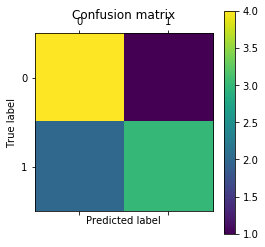

In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Accuracy

In [19]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
print 'Accuracy:', accuracy_score(y_true, y_pred)

Accuracy: 0.5


In [28]:
# LogisticRegression.score() predicts and scores labels for a test set using
# accuracy. Let's evaluate our classifier's accuracy:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print np.mean(scores), scores

0.956447296794 [ 0.965311    0.96291866  0.95334928  0.95095694  0.9497006 ]


## Precision and Recall

In [ ]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print 'Precision', np.mean(precisions), precisions
recalls = cross_val_score(classifier, X_train, y_train, cv=5,scoring='recall')
print 'Recalls', np.mean(recalls), recalls

# 4. F1 Score / F Score

In [ ]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print 'F1', np.mean(f1s), f1s

# 5. ROC AUC - Receiver Operating Characteristic, or ROC curve,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

# 6. Tuning Models with Grid Search

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
                        ('vect', TfidfVectorizer(stop_words='english')),
                        ('clf', LogisticRegression())
                    ])
parameters = {
                'vect__max_df': (0.25, 0.5, 0.75),
                'vect__stop_words': ('english', None),
                'vect__max_features': (2500, 5000, 10000, None),
                'vect__ngram_range': ((1, 1), (1, 2)),
                'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
                'clf__penalty': ('l1', 'l2'),
                'clf__C': (0.01, 0.1, 1, 10),
                }

def main():
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring='accuracy', cv=3)
    df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)
    X, y, = df[1], df[0]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    grid_search.fit(X_train, y_train)
    print 'Best score: %0.3f' % grid_search.best_score_
    print 'Best parameters set:'
    
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print '\t%s: %r' % (param_name, best_parameters[param_name])
    
    predictions = grid_search.predict(X_test)
    print 'Accuracy:', accuracy_score(y_test, predictions)
    print 'Precision:', precision_score(y_test, predictions)
    print 'Recall:', recall_score(y_test, predictions)

main()

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  6.2min finished


Best score: 0.985
Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__max_features: 10000
	vect__ngram_range: (1, 2)
	vect__norm: 'l2'
	vect__stop_words: None
	vect__use_idf: True
Accuracy: 0.987078248385
Precision:

ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], 
      dtype='|S4')

# 7. Multi-class classification

In [42]:
import pandas as pd
# Explore the data
df = pd.read_csv('movie-reviews/train.tsv', header=0, delimiter='\t')
print df.count()

 PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [43]:
print df.head()

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [44]:
print df['Phrase'].head(10)

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object


In [45]:
print df['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64


In [46]:
print df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [56]:
# Train classofier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

global grid_search
def main():
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', LogisticRegression())
    ])
    parameters = {
        'vect__max_df': (0.25, 0.5),
        'vect__ngram_range': ((1, 1), (1, 2)),
        'vect__use_idf': (True, False),
        'clf__C': (0.1, 1, 10),
    }
    df = pd.read_csv('movie-reviews/train.tsv', header=0, delimiter='\t')
    X, y = df['Phrase'], df['Sentiment'].as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print 'Best score: %0.3f' % grid_search.best_score_
    print 'Best parameters set:'
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print '\t%s: %r' % (param_name, best_parameters[param_name])
    

main()

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  2.5min finished


Best score: 0.622
Best parameters set:
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: False


## Multi-class classification performance metrics

As with binary classification, confusion matrices are useful for visualizing the types
of errors made by the classifier. Precision, recall, and F1 score can be computed for
each of the classes, and accuracy for all of the predictions can also be calculated.
Let's evaluate our classifier's predictions.

In [ ]:
predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print 'Confusion Matrix:', confusion_matrix(y_test, predictions)
print 'Classification Report:', classification_report(y_test, predictions)

First, we make predictions using the best parameter set found by using grid searching.
While our classifier is an improvement over the baseline classifier, it frequently
mistakes Somewhat Positive and Somewhat Negative for Neutral.